In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import tensorflow as tf
import numpy as np

import hmm

In [17]:
x = np.arange(0, 100, 1)
truth = np.array((x / 10) % 2, dtype=float)
y = (truth + np.random.random(truth.shape) * 1.5)
y /= np.max(y)

In [24]:
y.shape

(100,)

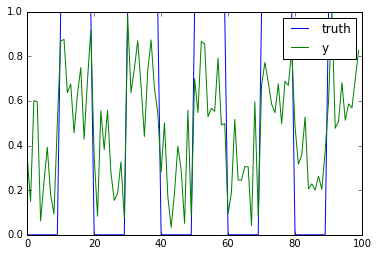

In [18]:
plot(truth, label='truth')
plot(y, label='y')
legend()

In [19]:
# hmm_tf = hmm.HMMTensorflow(np.array([[0.5, 0.5], [0.5, 0.5]]))
hmm_tf = hmm.HMMTensorflow(np.array([[0.9, 0.1], [0.1, 0.9]]))

In [20]:
tf_s_graph, tf_scores_graph = hmm_tf.viterbi_decode(y, len(y))

tf_s = tf.Session().run(tf_s_graph)
tf_scores = [tf_scores_graph[0]]
tf_scores.extend([tf.Session().run(g) for g in tf_scores_graph[1:]])
print np.array(tf_scores)

[[ -1.11922505  -1.75176641]
 [ -1.38673122  -3.7563648 ]
 [ -2.41098584  -4.19841011]
 [ -3.42385876  -4.82049157]
 [ -3.59381353  -7.69760524]
 [ -3.96580475  -7.34864426]
 [ -4.56947116  -7.20375906]
 [ -4.8711404   -8.59667215]
 [ -5.07455554  -9.54458281]
 [ -5.87058997  -8.07276721]
 [ -8.00059799  -8.31478515]
 [-10.18966807  -8.55306883]
 [-11.30862931  -9.10927351]
 [-12.53690689  -9.60713867]
 [-12.52036312 -10.49557891]
 [-13.6186676  -11.06374406]
 [-14.74805954 -11.45831261]
 [-14.32024643 -12.41132717]
 [-15.60192629 -12.88545229]
 [-17.67711931 -13.07744548]
 [-15.81781181 -14.21975976]
 [-16.00997823 -16.81228985]
 [-16.92741397 -17.50452198]
 [-17.51272795 -18.57434557]
 [-18.43356858 -19.26386768]
 [-18.86807006 -20.64055799]
 [-19.14086682 -22.61562139]
 [-19.45163691 -23.12714866]
 [-19.95224731 -22.87358322]
 [-20.13670486 -24.83120014]
 [-24.25644059 -22.45750915]
 [-25.37541926 -23.01370391]
 [-26.67519614 -23.41604482]
 [-27.75774197 -23.66083319]
 [-27.07538128

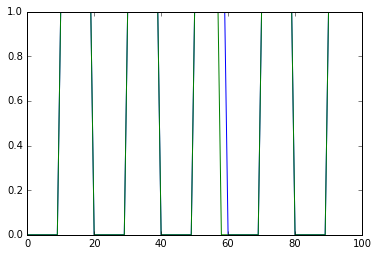

In [21]:
plot(truth)
plot(tf_s)

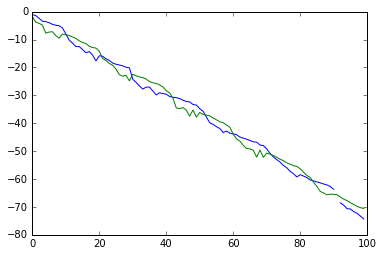

In [22]:
plot(tf_scores)

In [23]:
g_posterior, _, _ = hmm_tf.forward_backward(y)

tf_posterior = tf.Session().run(tf.concat(g_posterior))

TypeError: concat() takes at least 2 arguments (1 given)

In [ ]:
g_posterior, _, _ = hmm_tf.forward_backward(y)

tf_posterior = np.concatenate(tf.Session().run(g_posterior))

In [ ]:
plot(tf_posterior[:,0])